In [3]:
import numpy as np
import scipy.stats as stats


import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
import numpy as np


part a 

In [5]:
df  = pd.read_csv('diabetes.csv')

# look at first few rows 
df.head()


kurtosis = df['Insulin'].kurtosis()
skewness = df['Insulin'].skew()

kurtosis, skewness

(7.265911343503076, 2.268393486537506)

part b 

In [9]:
new_diabetes_dataset = df[df['Insulin'] != 0]


# see the first few rows.
new_diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
6,3,78,50.0,32,88,31.0,0.248,26,1
8,2,197,70.0,45,543,30.5,0.158,53,1
13,1,189,60.0,23,846,30.1,0.398,59,1


part c 

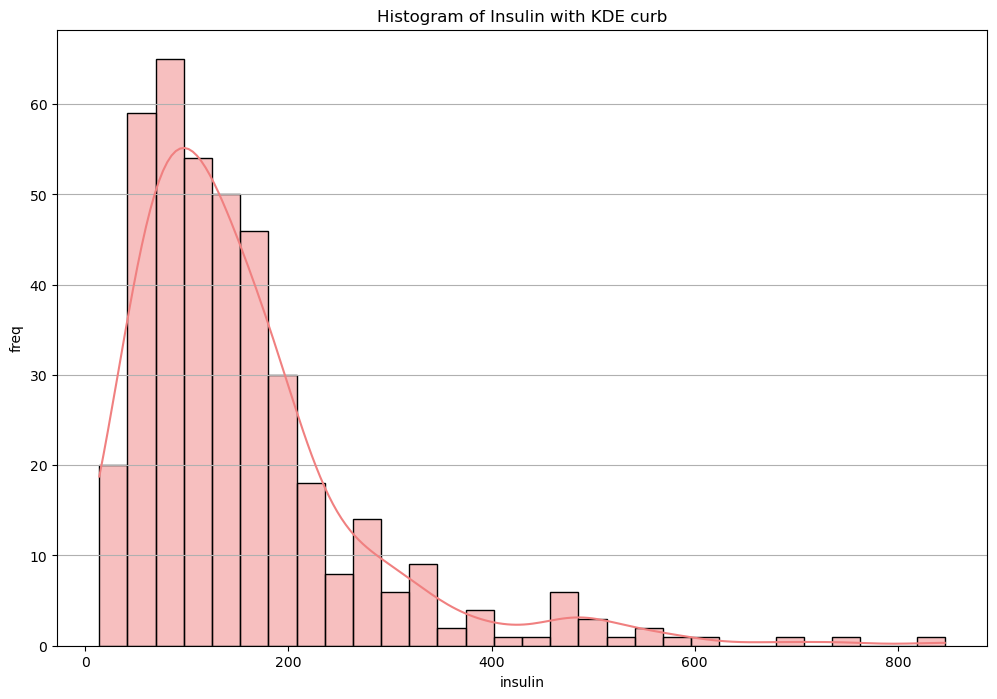

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(new_diabetes_dataset['Insulin'], kde=True, bins=30, color='lightcoral', edgecolor='black')

plt.title('Histogram of Insulin with KDE curb')

# label the relevant axes 
plt.xlabel('insulin')
plt.ylabel('freq')
plt.grid(axis='y')

# show the histogram 
plt.show()


part d 

C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\3785471430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset['Insulin'] = new_diabetes_dataset['Insulin'].clip(lower=lower_band, upper=upper_band)


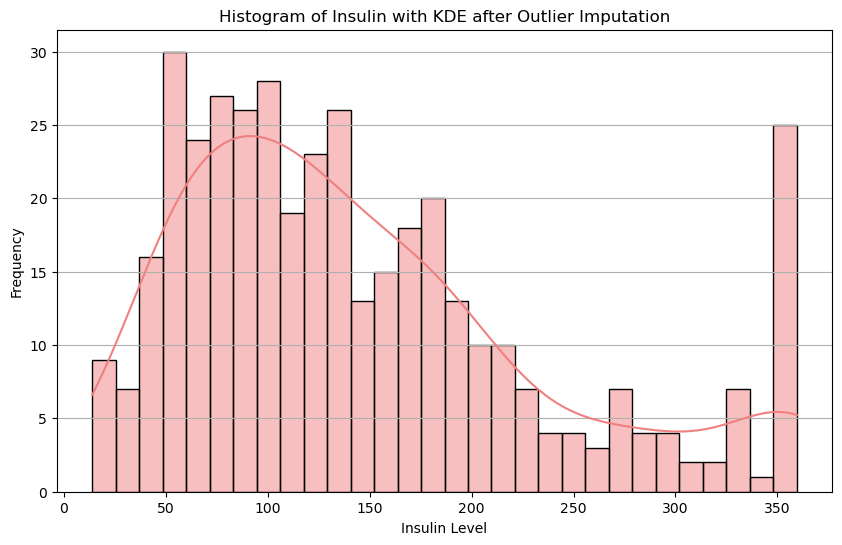

In [12]:
Q1 = new_diabetes_dataset['Insulin'].quantile(0.25)
Q3 = new_diabetes_dataset['Insulin'].quantile(0.75)


IQR = Q3 - Q1

lower_band = Q1 - 1.5 * IQR
upper_band = Q3 + 1.5 * IQR


new_diabetes_dataset['Insulin'] = new_diabetes_dataset['Insulin'].clip(lower=lower_band, upper=upper_band)


plt.figure(figsize=(10, 6))
sns.histplot(new_diabetes_dataset['Insulin'], kde=True, bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Insulin with KDE after Outlier Imputation')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


part e 

In [13]:
new_diabetes_dataset['Insulin_log'] = new_diabetes_dataset['Insulin'].apply(lambda x: np.log(x + 1))
new_diabetes_dataset[['Insulin', 'Insulin_log']].head()

C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\1852960549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset['Insulin_log'] = new_diabetes_dataset['Insulin'].apply(lambda x: np.log(x + 1))


,Insulin,Insulin_log
3,94.0,4.553877
4,168.0,5.129899
6,88.0,4.488636
8,359.5,5.887492
13,359.5,5.887492


f

In [14]:
kurtosis2 = new_diabetes_dataset['Insulin_log'].kurtosis()
skewness2 = new_diabetes_dataset['Insulin_log'].skew()

kurtosis2, skewness2


(0.04668578356986641, -0.39424325557435635)

g 

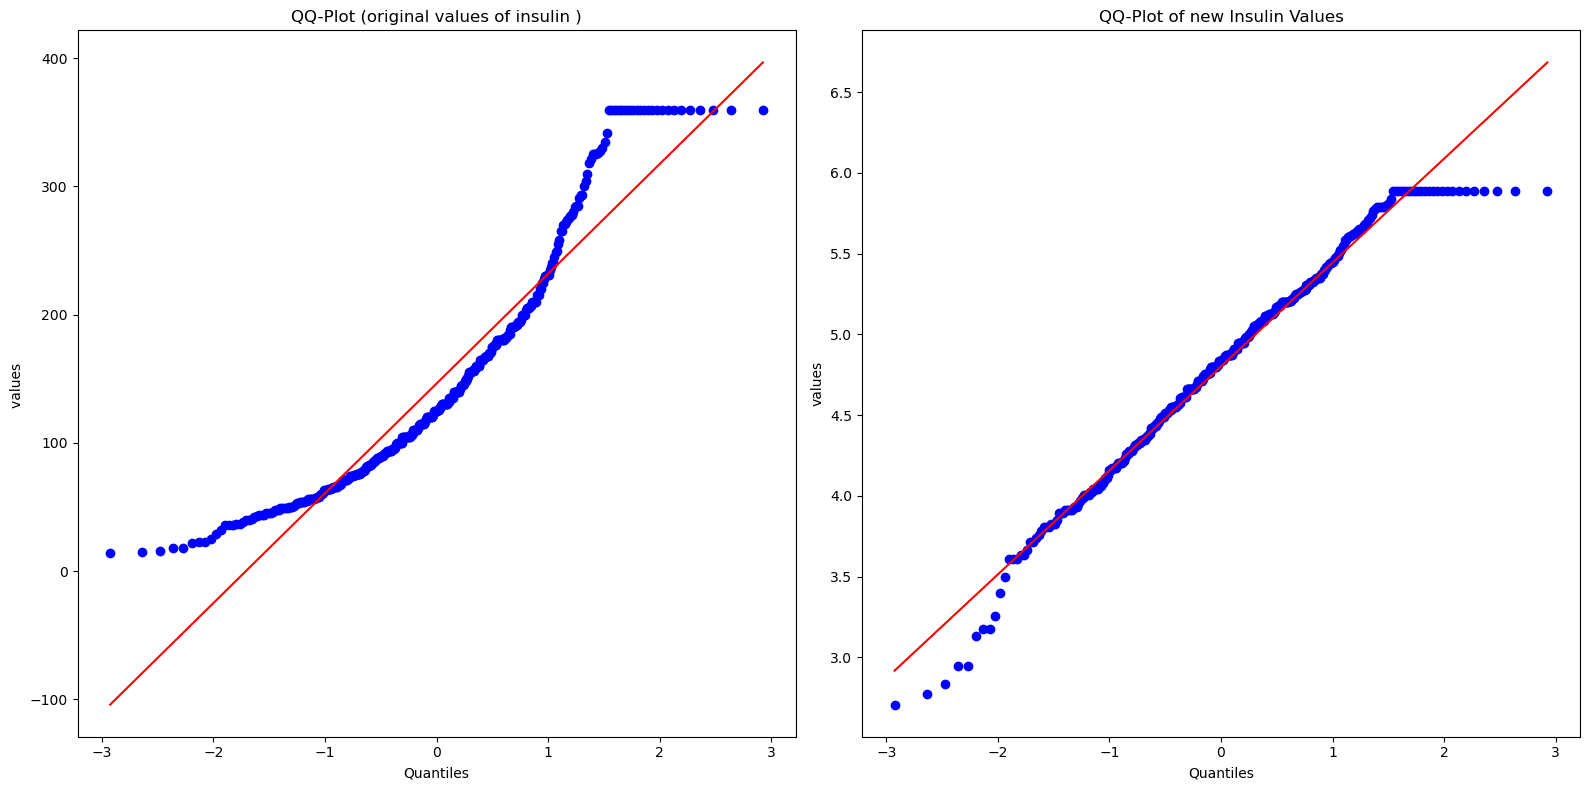

In [17]:
y , x = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))



stats.probplot(new_diabetes_dataset['Insulin'], plot=x[0])
x[0].set_title('QQ-Plot (original values of insulin )')
x[0].set_xlabel('Quantiles')
x[0].set_ylabel('values ')













stats.probplot(new_diabetes_dataset['Insulin_log'], plot=x[1])
x[1].set_title('QQ-Plot of new Insulin Values')
x[1].set_xlabel('Quantiles')
x[1].set_ylabel('values')

plt.tight_layout()
plt.show()

In [18]:
part h 

SyntaxError: invalid syntax (3271019936.py, line 1)

In [19]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness']


for column in cols:
    Q1 = new_diabetes_dataset[column].quantile(0.25)
    Q3 = new_diabetes_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    new_diabetes_dataset[column] = new_diabetes_dataset[column].clip(lower=lower,   upper=upper)


new_diabetes_dataset[cols].head()


C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\661910380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset[column] = new_diabetes_dataset[column].clip(lower=lower,   upper=upper)
C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\661910380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset[column] = new_diabetes_dataset[column].clip(lower=lower,   upper=upper)
C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\661910380.py:10: SettingWithCopyWarning: 
A value 

,Glucose,BloodPressure,SkinThickness
3,89,66.0,23
4,137,40.0,35
6,78,50.0,32
8,197,70.0,45
13,189,60.0,23


part i 

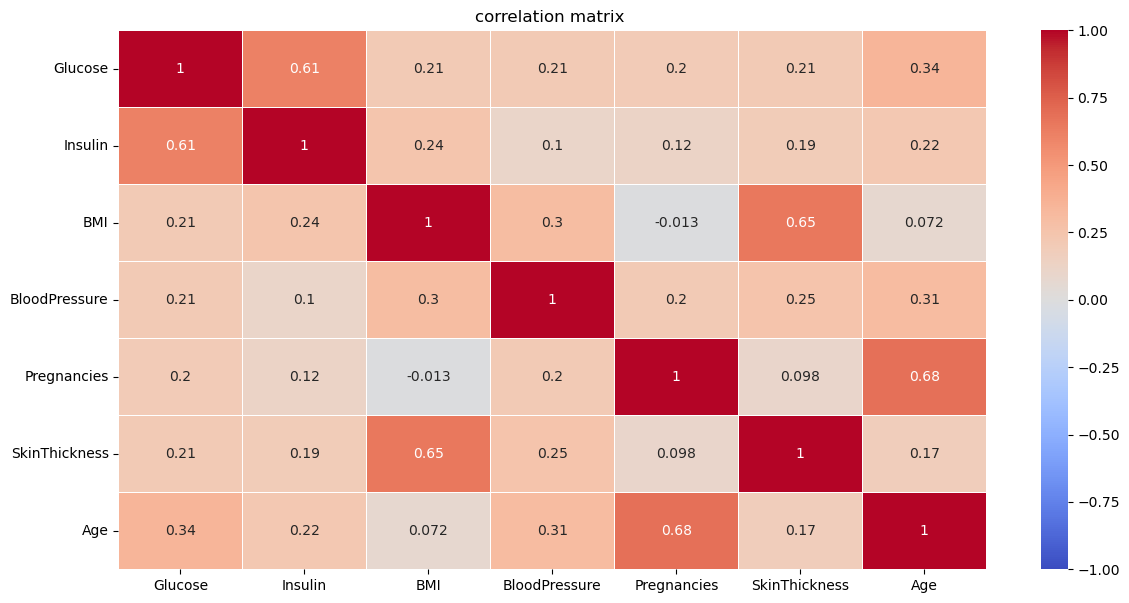

In [20]:
cols2 = [ 'Glucose', 'Insulin', 'BMI', 'BloodPressure', 'Pregnancies', 'SkinThickness',  'Age']


corr_matrix = new_diabetes_dataset[cols2].corr()


plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# show the heatmap for the matrix

plt.title('correlation matrix ')
plt.show()


Question 2

part a 



In [21]:
df3= new_diabetes_dataset.groupby('Pregnancies')['BloodPressure'].mean().reset_index()
df3.head()


,Pregnancies,BloodPressure
0,0,73.263158
1,1,68.468085
2,2,66.107692
3,3,70.177778
4,4,70.458333


part b 

In [22]:
df4 = new_diabetes_dataset.groupby('Pregnancies')['Age'].agg(['mean',   'sum',   'count']).reset_index()
df4.head()


,Pregnancies,mean,sum,count
0,0,24.258621,1407,58
1,1,27.122449,2658,98
2,2,25.194030,1688,67
3,3,28.244444,1271,45
4,4,30.407407,821,27


part c 


In [23]:
new_diabetes_dataset['BMI/Age'] = new_diabetes_dataset['BMI'] / new_diabetes_dataset['Age']


new_diabetes_dataset[['BMI', 'Age', 'BMI/Age']].head()


C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\3663340197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset['BMI/Age'] = new_diabetes_dataset['BMI'] / new_diabetes_dataset['Age']


,BMI,Age,BMI/Age
3,28.1,21,1.338095
4,43.1,15,2.873333
6,31.0,26,1.192308
8,30.5,53,0.575472
13,30.1,59,0.510169


part d 

In [25]:

j = [
    (new_diabetes_dataset['BMI'] > 45) & (new_diabetes_dataset['BloodPressure'] > 100),
    
    (new_diabetes_dataset['BMI'].between(30, 45)) & (new_diabetes_dataset['BloodPressure'] < 100),
    
    
    (new_diabetes_dataset['BMI'] < 30)
]

i = ['high', 'medium' , 'low']



new_diabetes_dataset['risk'] = np.select(j, i,   default='Unknown')
new_diabetes_dataset[['BMI', 'BloodPressure', 'risk']].head()


C:\Users\krmch\AppData\Local\Temp\ipykernel_23268\4152748632.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_diabetes_dataset['risk'] = np.select(j, i,   default='Unknown')


,BMI,BloodPressure,risk
3,28.1,66.0,low
4,43.1,40.0,medium
6,31.0,50.0,medium
8,30.5,70.0,medium
13,30.1,60.0,medium


part e 


In [27]:
df6 = pd.read_csv("C:\\Users\\krmch\\OneDrive\\Desktop\\ages.csv")


df7 = pd.merge(new_diabetes_dataset, df6, on='Age', how='left')


df7[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,21,Adult
1,15,Adolescent
2,26,Adult
3,53,Adult
4,59,Adult


part f 

In [30]:

df8 = pd.merge(new_diabetes_dataset, df6, on='Age', how='left')

# One-hot encode 
df9 = pd.get_dummies(df8['AgeGroup'], prefix='AgeGroup')


df8= pd.concat([df8, df9], axis=1)


df8.drop('AgeGroup', axis=1, inplace=True)

# Display the first few rows
df8[['Age', 'AgeGroup_Adult', 'AgeGroup_Adolescent']].head()



,Age,AgeGroup_Adult,AgeGroup_Adolescent
0,21,1,0
1,15,0,1
2,26,1,0
3,53,1,0
4,59,1,0
